# Exploratory Data Analysys (EDA)
## Costumer loans dataset


 **Cel Biznesowy**: Celem projektu będzie jest zbudowanie modelu predykcyjnego który na podstwie dostępnych cech będzie w stanie określić czy dana osoba dostanie  kredyt(1) czy też nie (0) (czyli kolumne FINALIZED_LOAN)  
 **Zmienna celu**: FINALIZED_LOAN
 

In [208]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import  Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [209]:
df = pd.read_csv("orig_train.csv")
df.head(10)

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0,5,...,1,0,0,0,0,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0,5,...,8,0,0,0,0,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0,2,...,1,1,1,0,0,0,0,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0,9,...,2,0,0,0,0,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0,5,...,1,1,1,0,0,0,0,0,0,0
5,C,40,Rural area,Owner without mortgage,Missing,single,1,0,740.0,7,...,1,0,0,0,0,0,0,0,0,0
6,C,45,County capital,Owner without mortgage,Missing,married,3,1,1010.0,7,...,12,0,0,0,0,0,0,0,0,0
7,B,27,Rural area,Living with family,Post secondary school,single,1,0,630.0,4,...,2,0,0,0,0,0,0,0,0,1
8,C,45,Rural area,Owner without mortgage,Other,married,2,0,816.8,20,...,1,1,1,0,0,0,0,0,0,0
9,F,34,County capital,Living with family,Post-graduate,married,3,1,2373.0,4,...,13,0,0,0,0,0,0,0,0,0


In [210]:
len(df)

15097

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15097 entries, 0 to 15096
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PRODUCT                          15097 non-null  object 
 1   AGE                              15097 non-null  int64  
 2   AREA                             15097 non-null  object 
 3   RESIDENTIAL_PLACE                15097 non-null  object 
 4   EDUCATION                        15097 non-null  object 
 5   MARITAL_STATUS                   15097 non-null  object 
 6   HOUSEHOLD_MEMBERS                15097 non-null  int64  
 7   NO_OF_DEPENDENTS                 15097 non-null  int64  
 8   INCOME                           15097 non-null  float64
 9   WORK_SENIORITY                   15097 non-null  int64  
 10  BUSINESS AGE                     15097 non-null  int64  
 11  ECONOMIC_SECTOR                  15097 non-null  object 
 12  EMPLOYEE_NO       

In [212]:
df.isnull().sum()

PRODUCT                            0
AGE                                0
AREA                               0
RESIDENTIAL_PLACE                  0
EDUCATION                          0
MARITAL_STATUS                     0
HOUSEHOLD_MEMBERS                  0
NO_OF_DEPENDENTS                   0
INCOME                             0
WORK_SENIORITY                     0
BUSINESS AGE                       0
ECONOMIC_SECTOR                    0
EMPLOYEE_NO                        0
LENGTH_RELATIONSHIP_WITH_CLIENT    0
DEBIT_CARD                         0
CURRENT_ACCOUNT                    0
SAVING_ACCOUNT                     0
SALARY_ACCOUNT                     0
FOREIGN_ACCOUNT                    0
FINALIZED_LOAN                     0
DEPOSIT                            0
PENSION_FUNDS                      0
DEFAULT_FLAG                       0
dtype: int64

### nie mamy w ramce żadnych braków danych

In [213]:
df.describe()

,AGE,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
count,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.0,15097.000000
mean,43.584553,1.717229,0.199510,1958.071916,6.647347,17.938001,4.996556,0.384116,0.485461,0.000397,0.123203,0.000132,0.164205,0.003709,0.0,0.057230
std,13.460964,0.759843,0.493135,1772.153274,5.647763,12.477914,4.900952,0.486402,0.499805,0.019932,0.328681,0.011509,0.370474,0.060793,0.0,0.232289
min,19.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,32.000000,1.000000,0.000000,1007.420000,3.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,42.000000,2.000000,0.000000,1426.495000,5.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,56.000000,2.000000,0.000000,2290.000000,8.000000,21.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,74.000000,5.000000,4.000000,40621.600000,46.000000,116.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [214]:
df.head()

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0,5,...,1,0,0,0,0,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0,5,...,8,0,0,0,0,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0,2,...,1,1,1,0,0,0,0,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0,9,...,2,0,0,0,0,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0,5,...,1,1,1,0,0,0,0,0,0,0


## Dataset Description
#### Variables in order:
**PRODUCT** - Type of financial product the client has  
**AGE** - age of client  
**AREA** - The geographical area where the client resides  
**RESIDENTAL_PLACE** -  Indicates whether the client owns their living place (with further distinction on having a mortgage or not), lives with family, or is renting  
**EDUCATION** - The highest level of education attained by the client  
**MARTIAL_STATUS** - Describes the client's marital status, including options such as single, married, divorced, or widowed  
**HOUSEHOLD_MEMBERS** - The number of people living in the client's household  
**NO_OF_DEPENDENTS** - The number of individuals financially dependent on the client  
**INCOME** - The client's monthly income  
**WORK_SENIORITY** - The total number of years the client has been working  
**BUSINESS AGE** -  The number of years the business where the client is employed has been operational.  
**ECONOMIC SECTOR** -  The economic sector in which the client works.  
**EMPOLYEE_NO** -  The number of employees in the company where the client works.  
**LENGTH_RELATIONSHIP_WITH_CLIENT**	- The duration (in years) of the client's relationship with the bank    
**DEBIT_CARD**- wheter clinet owns a debit card or not  
**CURRENT_ACCOUNT** -  wheter client owns a current account  
**SAVING_ACCOUNT** - wheter client owns a saving account  
**SALARY_ACCOUNT** - Indicates whether the client has a salary account with the bank, designed for receiving payroll  
**FOREIGN_ACCOUNT** -  Whether the client holds any bank accounts in foreign countries  
**FINALIZED_LOAN** - Wheter the client fully repaid the loan  
**DEPOSIT** -   Indicates whether the client has made any fixed or term deposits with the bank  
**PENSION_FUNDS** - Whether the client has invested in any pension funds through the bank  
**DEFAULT_FLAG**- A binary indicator showing whether the client has been granted a loan by the bank (e.g., Yes/No, 1/0).


In [215]:
df.var()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13836\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


AGE                                1.811976e+02
HOUSEHOLD_MEMBERS                  5.773615e-01
NO_OF_DEPENDENTS                   2.431821e-01
INCOME                             3.140527e+06
WORK_SENIORITY                     3.189722e+01
BUSINESS AGE                       1.556983e+02
LENGTH_RELATIONSHIP_WITH_CLIENT    2.401933e+01
DEBIT_CARD                         2.365866e-01
CURRENT_ACCOUNT                    2.498052e-01
SAVING_ACCOUNT                     3.972983e-04
SALARY_ACCOUNT                     1.080314e-01
FOREIGN_ACCOUNT                    1.324679e-04
FINALIZED_LOAN                     1.372507e-01
DEPOSIT                            3.695832e-03
PENSION_FUNDS                      0.000000e+00
DEFAULT_FLAG                       5.395822e-02
dtype: float64

## Rozkłady zmiennych numerycznych

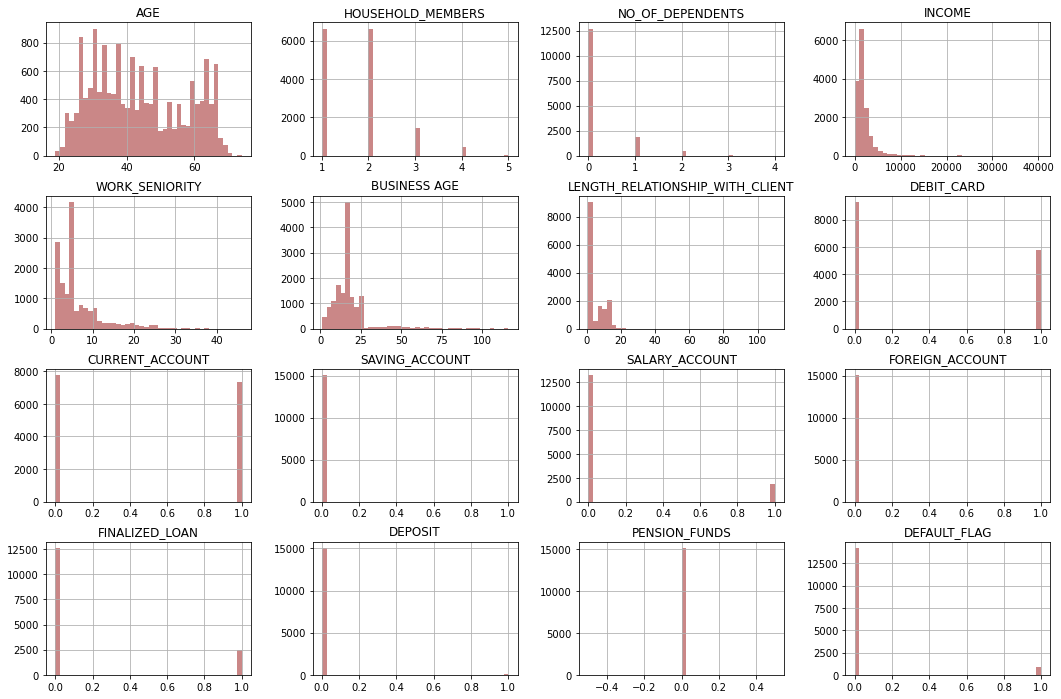

In [216]:
df.hist(bins = 40, figsize=(18, 12), color='#CA8787')
plt.show()

In [217]:
print(df['SAVING_ACCOUNT'].value_counts())
print('-----------------------------------')
print(df['DEPOSIT'].value_counts())
print('-----------------------------------')
print(df['FOREIGN_ACCOUNT'].value_counts())
print('-----------------------------------')
print(df['PENSION_FUNDS'].value_counts())

0    15091
1        6
Name: SAVING_ACCOUNT, dtype: int64
-----------------------------------
0    15041
1       56
Name: DEPOSIT, dtype: int64
-----------------------------------
0    15095
1        2
Name: FOREIGN_ACCOUNT, dtype: int64
-----------------------------------
0    15097
Name: PENSION_FUNDS, dtype: int64


### Bardzo dużo wartości 0 w kolumach SAVING_ACCOUNT, DEPOSIT, FOREIGN_ACCOUNT. Przeanalizujemy potem ich wpływ na predykcyjność modelu i rozważymy usunięcie.  PENSION_FUNDS możemy usunąć już na tym etapie ponieważ to całkowicie zerowa, nic nie wnosząca kolumna

In [218]:
df = df.drop("PENSION_FUNDS", axis = 1)

## Rozkłady zmiennych kategorycznych

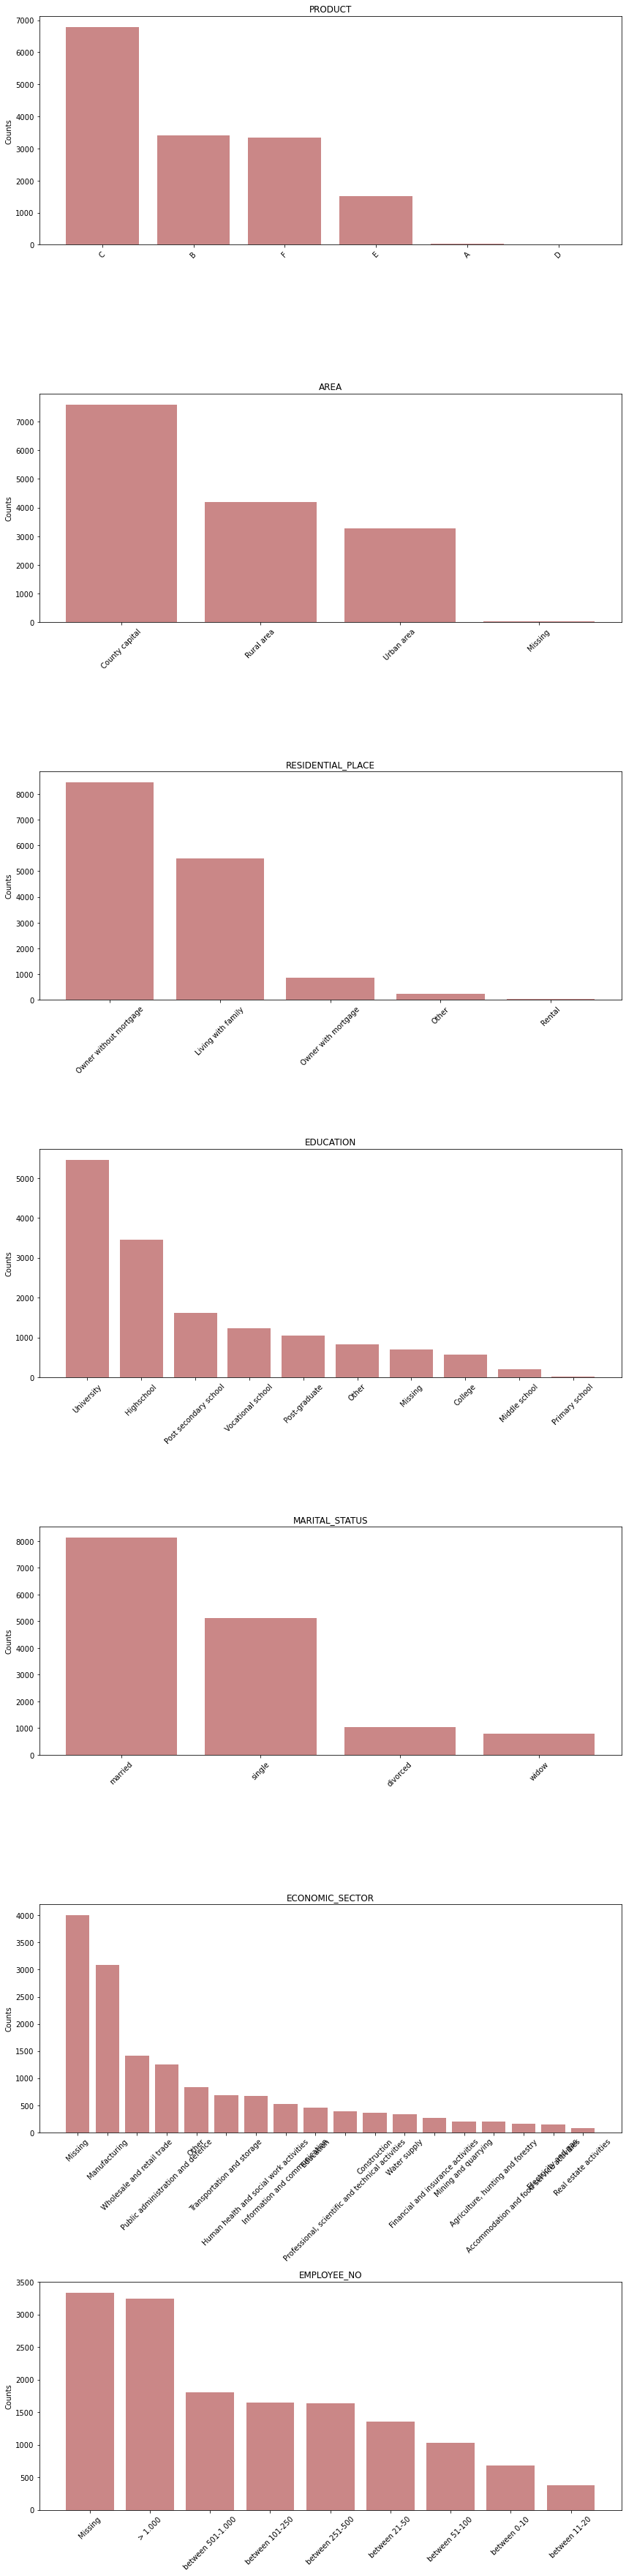

In [219]:
df_strings = df[["PRODUCT", "AREA", "RESIDENTIAL_PLACE", "EDUCATION", "MARITAL_STATUS", 'ECONOMIC_SECTOR', 'EMPLOYEE_NO']]
fig, axs = plt.subplots(nrows= 7, ncols=1, figsize=(12, 7 * 7))
for ax, column in zip(axs, ["PRODUCT", "AREA", "RESIDENTIAL_PLACE", "EDUCATION", "MARITAL_STATUS", 'ECONOMIC_SECTOR', 'EMPLOYEE_NO']):
    value_counts = df[column].value_counts()
    ax.bar(value_counts.index.astype(str), value_counts.values, color='#CA8787')
    ax.set_title(column)
    ax.set_ylabel('Counts')
    ax.tick_params(axis='x', rotation=45)  

plt.tight_layout()  
plt.show()                         

### w kolumach 'AREA' 'EDUCATION' 'ECONOMIC_SECTOR' , 'EMPOLYEE_NO'  mamy wartości 'missing', z czego w kolumnie 'AREA' jest ich bradzo mało, natomiast w pozostałych kolumach jest ich znaczy odsetek, być może wynika to z tego, że dana  osoba już nie pracuje, bądź nie uczy/uczyła się

### zobaczmy jak wartości 'missing' w  kolumnach economic_sector i empolyee_no zależą od wieku

Text(0, 0.5, 'COUNT')

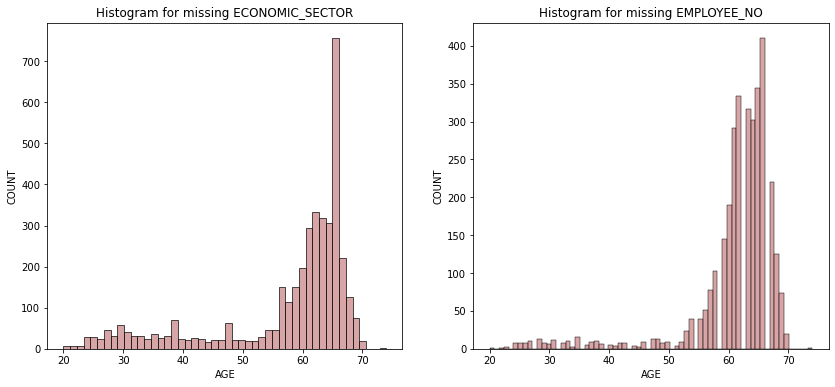

In [220]:
df_economic_missing = df[df['ECONOMIC_SECTOR']=='Missing']
df_employeen_missing=df[df['EMPLOYEE_NO']=='Missing']
fig, axs =plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(data=df_economic_missing, x='AGE', ax=axs[0], color='#CA8787')
axs[0].set_title('Histogram for missing ECONOMIC_SECTOR')
axs[0].set_xlabel('AGE')
axs[0].set_ylabel('COUNT')
sns.histplot(data=df_employeen_missing, x='AGE', ax=axs[1], color='#CA8787')
axs[1].set_title('Histogram for missing EMPLOYEE_NO')
axs[1].set_xlabel('AGE')
axs[1].set_ylabel('COUNT')

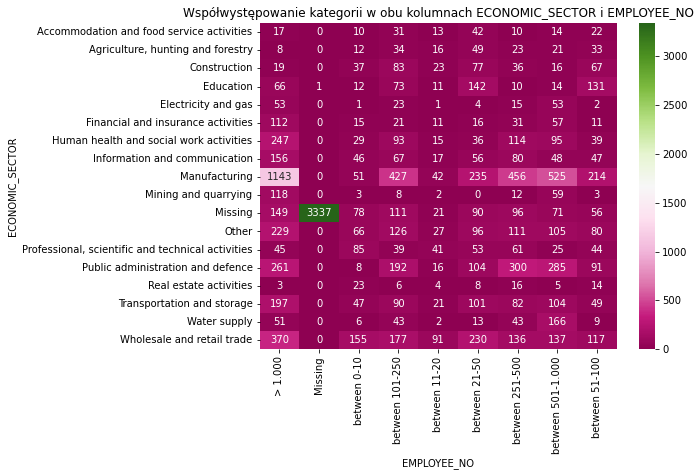

In [221]:
cross_tab = pd.crosstab(df['ECONOMIC_SECTOR'], df['EMPLOYEE_NO'])
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='PiYG', fmt='d')
plt.title('Współwystępowanie kategorii w obu kolumnach ECONOMIC_SECTOR i EMPLOYEE_NO')
plt.ylabel('ECONOMIC_SECTOR')
plt.xlabel('EMPLOYEE_NO')
plt.show()

### jak widzimy  występowanie wartości 'Missing' w kolumnie EMPLOYEE_NO jest zależne od występowania 'Missing' w kolumnie ECONOMIC_SECTOR, ponadto jak widać na histogramach, wartości te występują głównie dla osób 60+, wnioskujemy z tego, że to wartości 'missing' wynikają z tego, że dana osoba jest emerytem. 

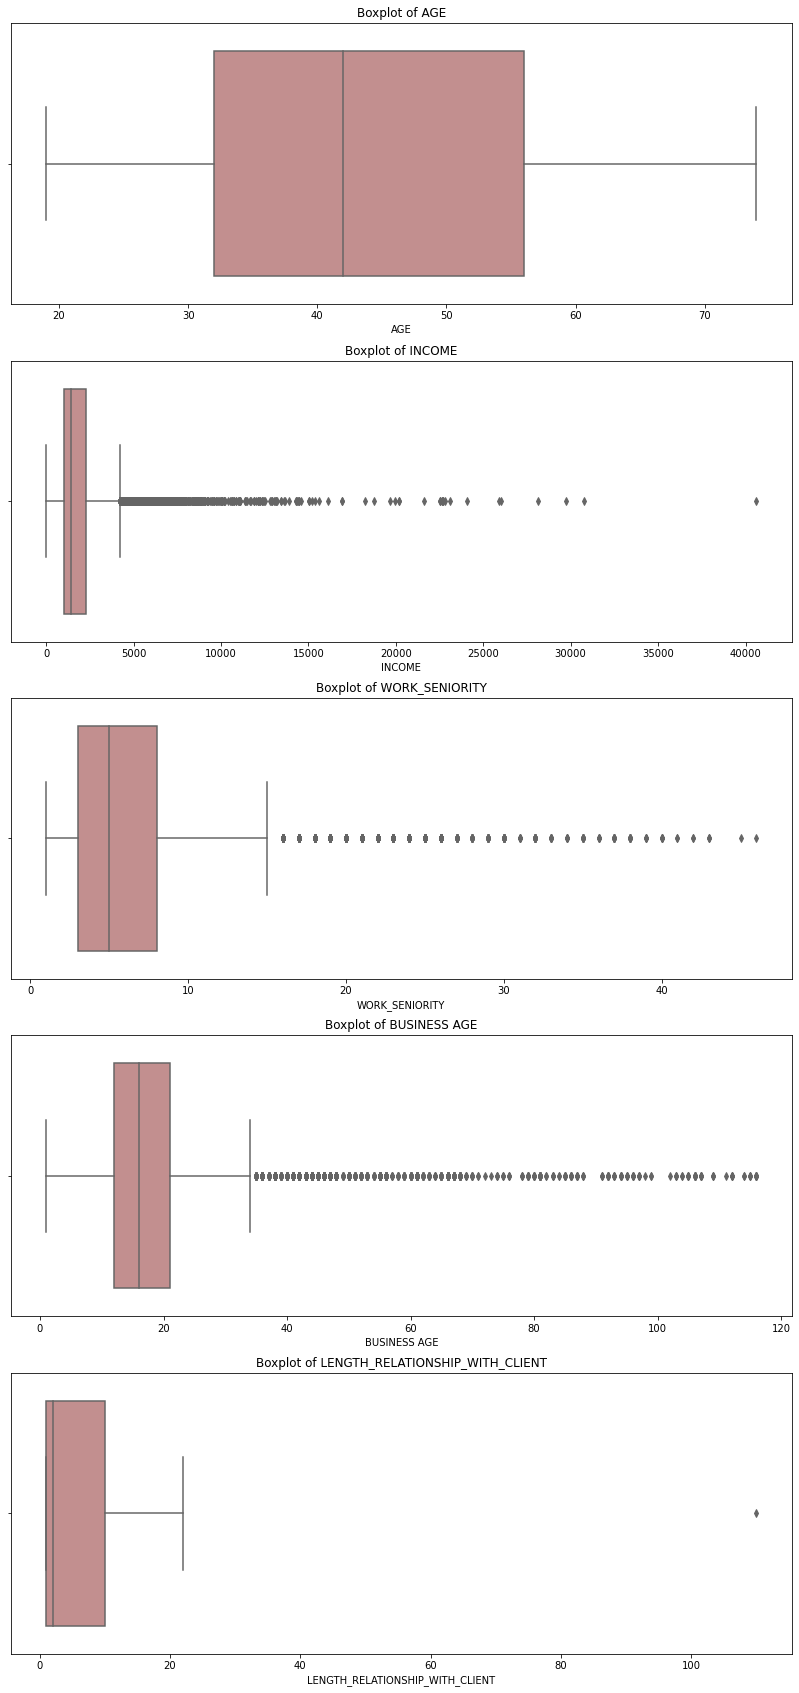

In [222]:
df_numerical = df.loc[:, ['AGE', 'INCOME', 'WORK_SENIORITY', 'BUSINESS AGE', 'LENGTH_RELATIONSHIP_WITH_CLIENT']]
fig, axs = plt.subplots(len(df_numerical.columns), 1, figsize=(14, 30))

for i, column in enumerate(df_numerical.columns):
    sns.boxplot(data=df_numerical, x=column, ax=axs[i], color='#CA8787')
    axs[i].set_title(f'Boxplot of {column}')

In [223]:
outliers_count = {}

for column in df_numerical.columns:
    Q1 = df_numerical[column].quantile(0.25)
    Q3 = df_numerical[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_numerical[(df_numerical[column] < lower_bound) | (df_numerical[column] > upper_bound)]
    outliers_count[column] = outliers.shape[0]

for column, count in outliers_count.items():
    print(f'Number of outliers in {column}: {count}')

Number of outliers in AGE: 0
Number of outliers in INCOME: 1054
Number of outliers in WORK_SENIORITY: 1268
Number of outliers in BUSINESS AGE: 997
Number of outliers in LENGTH_RELATIONSHIP_WITH_CLIENT: 1


#### sporo outlierów w 'INCOME', 'WORK_SENIORITY' i 'BUSINESS AGE'

### Macierz Korelacji zmiennych

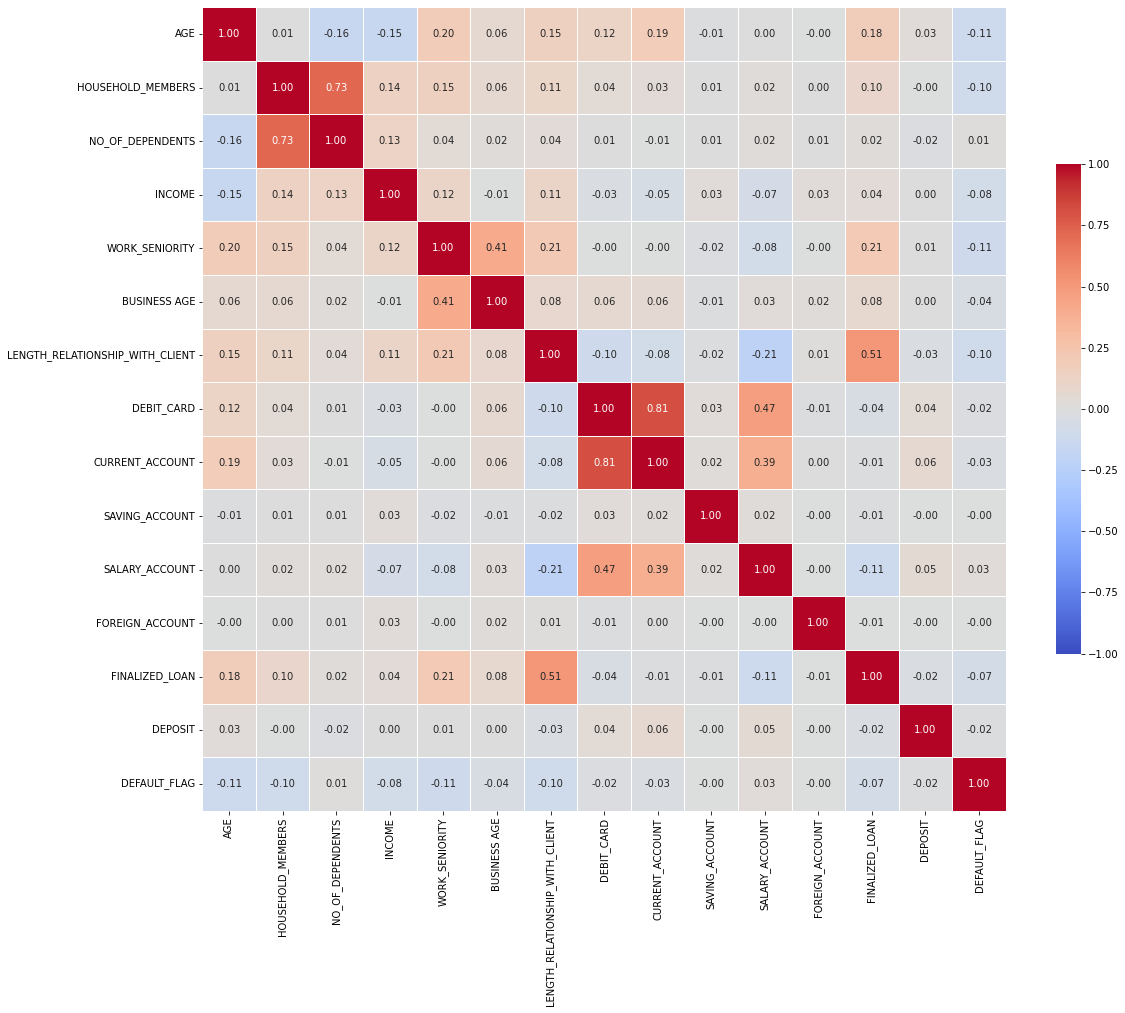

In [224]:
correlation_matrix = df.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)

plt.show()

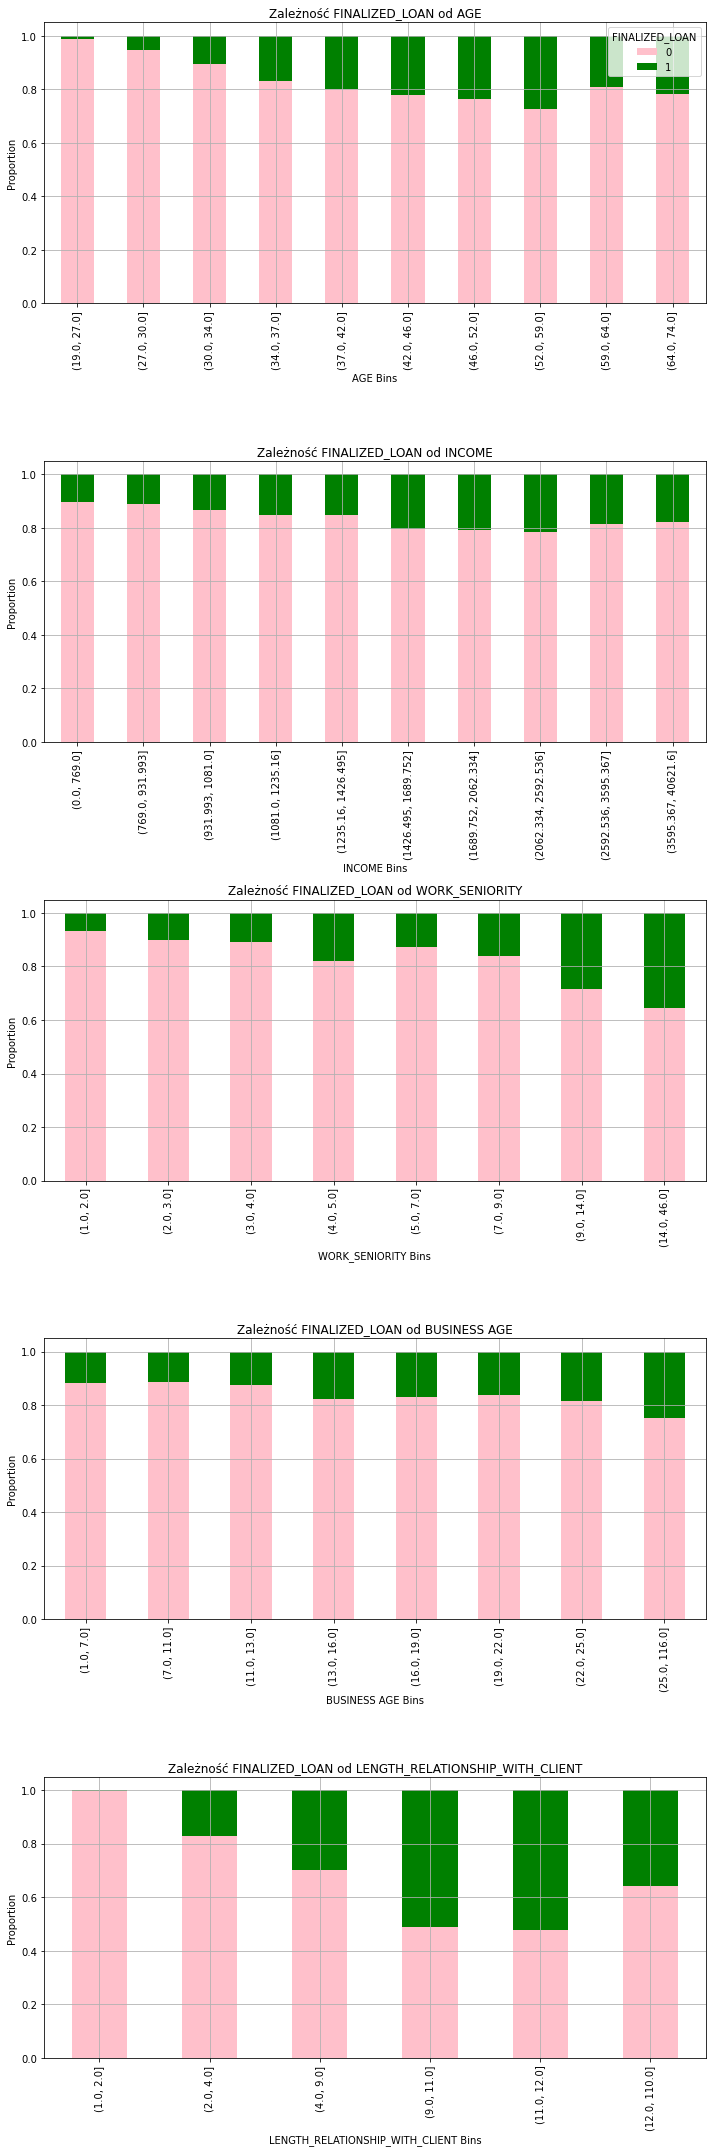

In [225]:
columns = ['AGE', 'INCOME', 'WORK_SENIORITY', 'BUSINESS AGE', 'LENGTH_RELATIONSHIP_WITH_CLIENT']
cat = 'FINALIZED_LOAN'

fig, axs = plt.subplots(len(columns), 1, figsize=(10, 30), sharey=True)

for i, num in enumerate(columns):
    breaks = np.quantile(df[num], q=np.linspace(0, 1, 11))
    tmp = df.groupby([cat, pd.cut(df[num], breaks, duplicates='drop')]).size().unstack().T
    tmp = tmp[df[cat].unique()]
    tmp["tot"] = tmp.sum(axis=1)

    for col in tmp.drop("tot", axis=1).columns:
        tmp[col] = tmp[col] / tmp["tot"]
    
    tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=axs[i], legend=(i==0), grid=True, color=['pink', 'green'])
    axs[i].set_title(f'Zależność {cat} od {num}')
    axs[i].set_xlabel(f'{num} Bins')
    axs[i].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

#### Z naszą zmienną celu najsliniej skorelowana jest zmienna LENGTH_RELATIONSHIP_WITH_CLIENT.  Sporą korelację obserwujemy też między zmiennymi NO_OF_DEPENDENTS i HOUSEHOLD_MEMBERS oraz CURRENT_ACCOUNT i DEBIT_CARD

# Feature Engineering (FE)

Przekształcenie zmiennych kategorycznych: Zakodujemy zmienne kategoryczne za pomocą kodowania gorących jedynek (One-Hot Encoding), aby mogły być wykorzystane przez modele uczenia maszynowego.

Normalizacja zmiennych numerycznych: Normalizujemy zmienne numeryczne, aby mieć podobny zakres wartości.

Usunięcie niepotrzebnych kolumn: Kolumna 'PENSION_FUNDS' już została usunięte, ponieważ nie ma żadnego wpływu na wynik pożyczek.

Badanie korelacji: Przeprowadzimy analizę korelacji między cechami, aby zidentyfikować silne związki między nimi.

In [226]:
df_test = pd.read_csv('orig_test.csv')
df_test.drop('PENSION_FUNDS', axis=1, inplace=True)
df_train = df

### sprawdźmy czy zbiór testowy i treningowy są dobrze podzielone względem zmiennej celu

In [227]:
train_class_proportions = df_train['FINALIZED_LOAN'].value_counts(normalize=True)
test_class_proportions = df_test['FINALIZED_LOAN'].value_counts(normalize=True)

print("Proporcje klas w zbiorze treningowym:")
print(train_class_proportions)

print("\nProporcje klas w zbiorze testowym:")
print(test_class_proportions)


Proporcje klas w zbiorze treningowym:
0    0.835795
1    0.164205
Name: FINALIZED_LOAN, dtype: float64

Proporcje klas w zbiorze testowym:
0    0.836836
1    0.163164
Name: FINALIZED_LOAN, dtype: float64


### Kodowanie zmiennych kategorycznych za pomocą get_dummies z biblioteki Pandas

In [228]:
df_train = pd.get_dummies(df_train, columns = ['PRODUCT', 'AREA', 'RESIDENTIAL_PLACE', 'EDUCATION', 'MARITAL_STATUS', 'ECONOMIC_SECTOR', 'EMPLOYEE_NO'])
df_test = pd.get_dummies(df_test, columns = ['PRODUCT', 'AREA', 'RESIDENTIAL_PLACE', 'EDUCATION', 'MARITAL_STATUS', 'ECONOMIC_SECTOR', 'EMPLOYEE_NO'])
print(df_train.columns== df_test.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]


In [229]:
df_train.columns

Index(['AGE', 'HOUSEHOLD_MEMBERS', 'NO_OF_DEPENDENTS', 'INCOME',
       'WORK_SENIORITY', 'BUSINESS AGE', 'LENGTH_RELATIONSHIP_WITH_CLIENT',
       'DEBIT_CARD', 'CURRENT_ACCOUNT', 'SAVING_ACCOUNT', 'SALARY_ACCOUNT',
       'FOREIGN_ACCOUNT', 'FINALIZED_LOAN', 'DEPOSIT', 'DEFAULT_FLAG',
       'PRODUCT_A', 'PRODUCT_B', 'PRODUCT_C', 'PRODUCT_D', 'PRODUCT_E',
       'PRODUCT_F', 'AREA_County capital', 'AREA_Missing', 'AREA_Rural area',
       'AREA_Urban area', 'RESIDENTIAL_PLACE_Living with family',
       'RESIDENTIAL_PLACE_Other', 'RESIDENTIAL_PLACE_Owner with mortgage',
       'RESIDENTIAL_PLACE_Owner without mortgage', 'RESIDENTIAL_PLACE_Rental',
       'EDUCATION_College', 'EDUCATION_Highschool', 'EDUCATION_Middle school',
       'EDUCATION_Missing', 'EDUCATION_Other',
       'EDUCATION_Post secondary school', 'EDUCATION_Post-graduate',
       'EDUCATION_Primary school', 'EDUCATION_University',
       'EDUCATION_Vocational school', 'MARITAL_STATUS_divorced',
       'MARITAL_STATUS_

In [230]:
count_1 = df_train['FINALIZED_LOAN'].value_counts()[1]
print("Liczba wystąpień wartości 1 w kolumnie FINALIZED_LOAN:", count_1)


Liczba wystąpień wartości 1 w kolumnie FINALIZED_LOAN: 2479


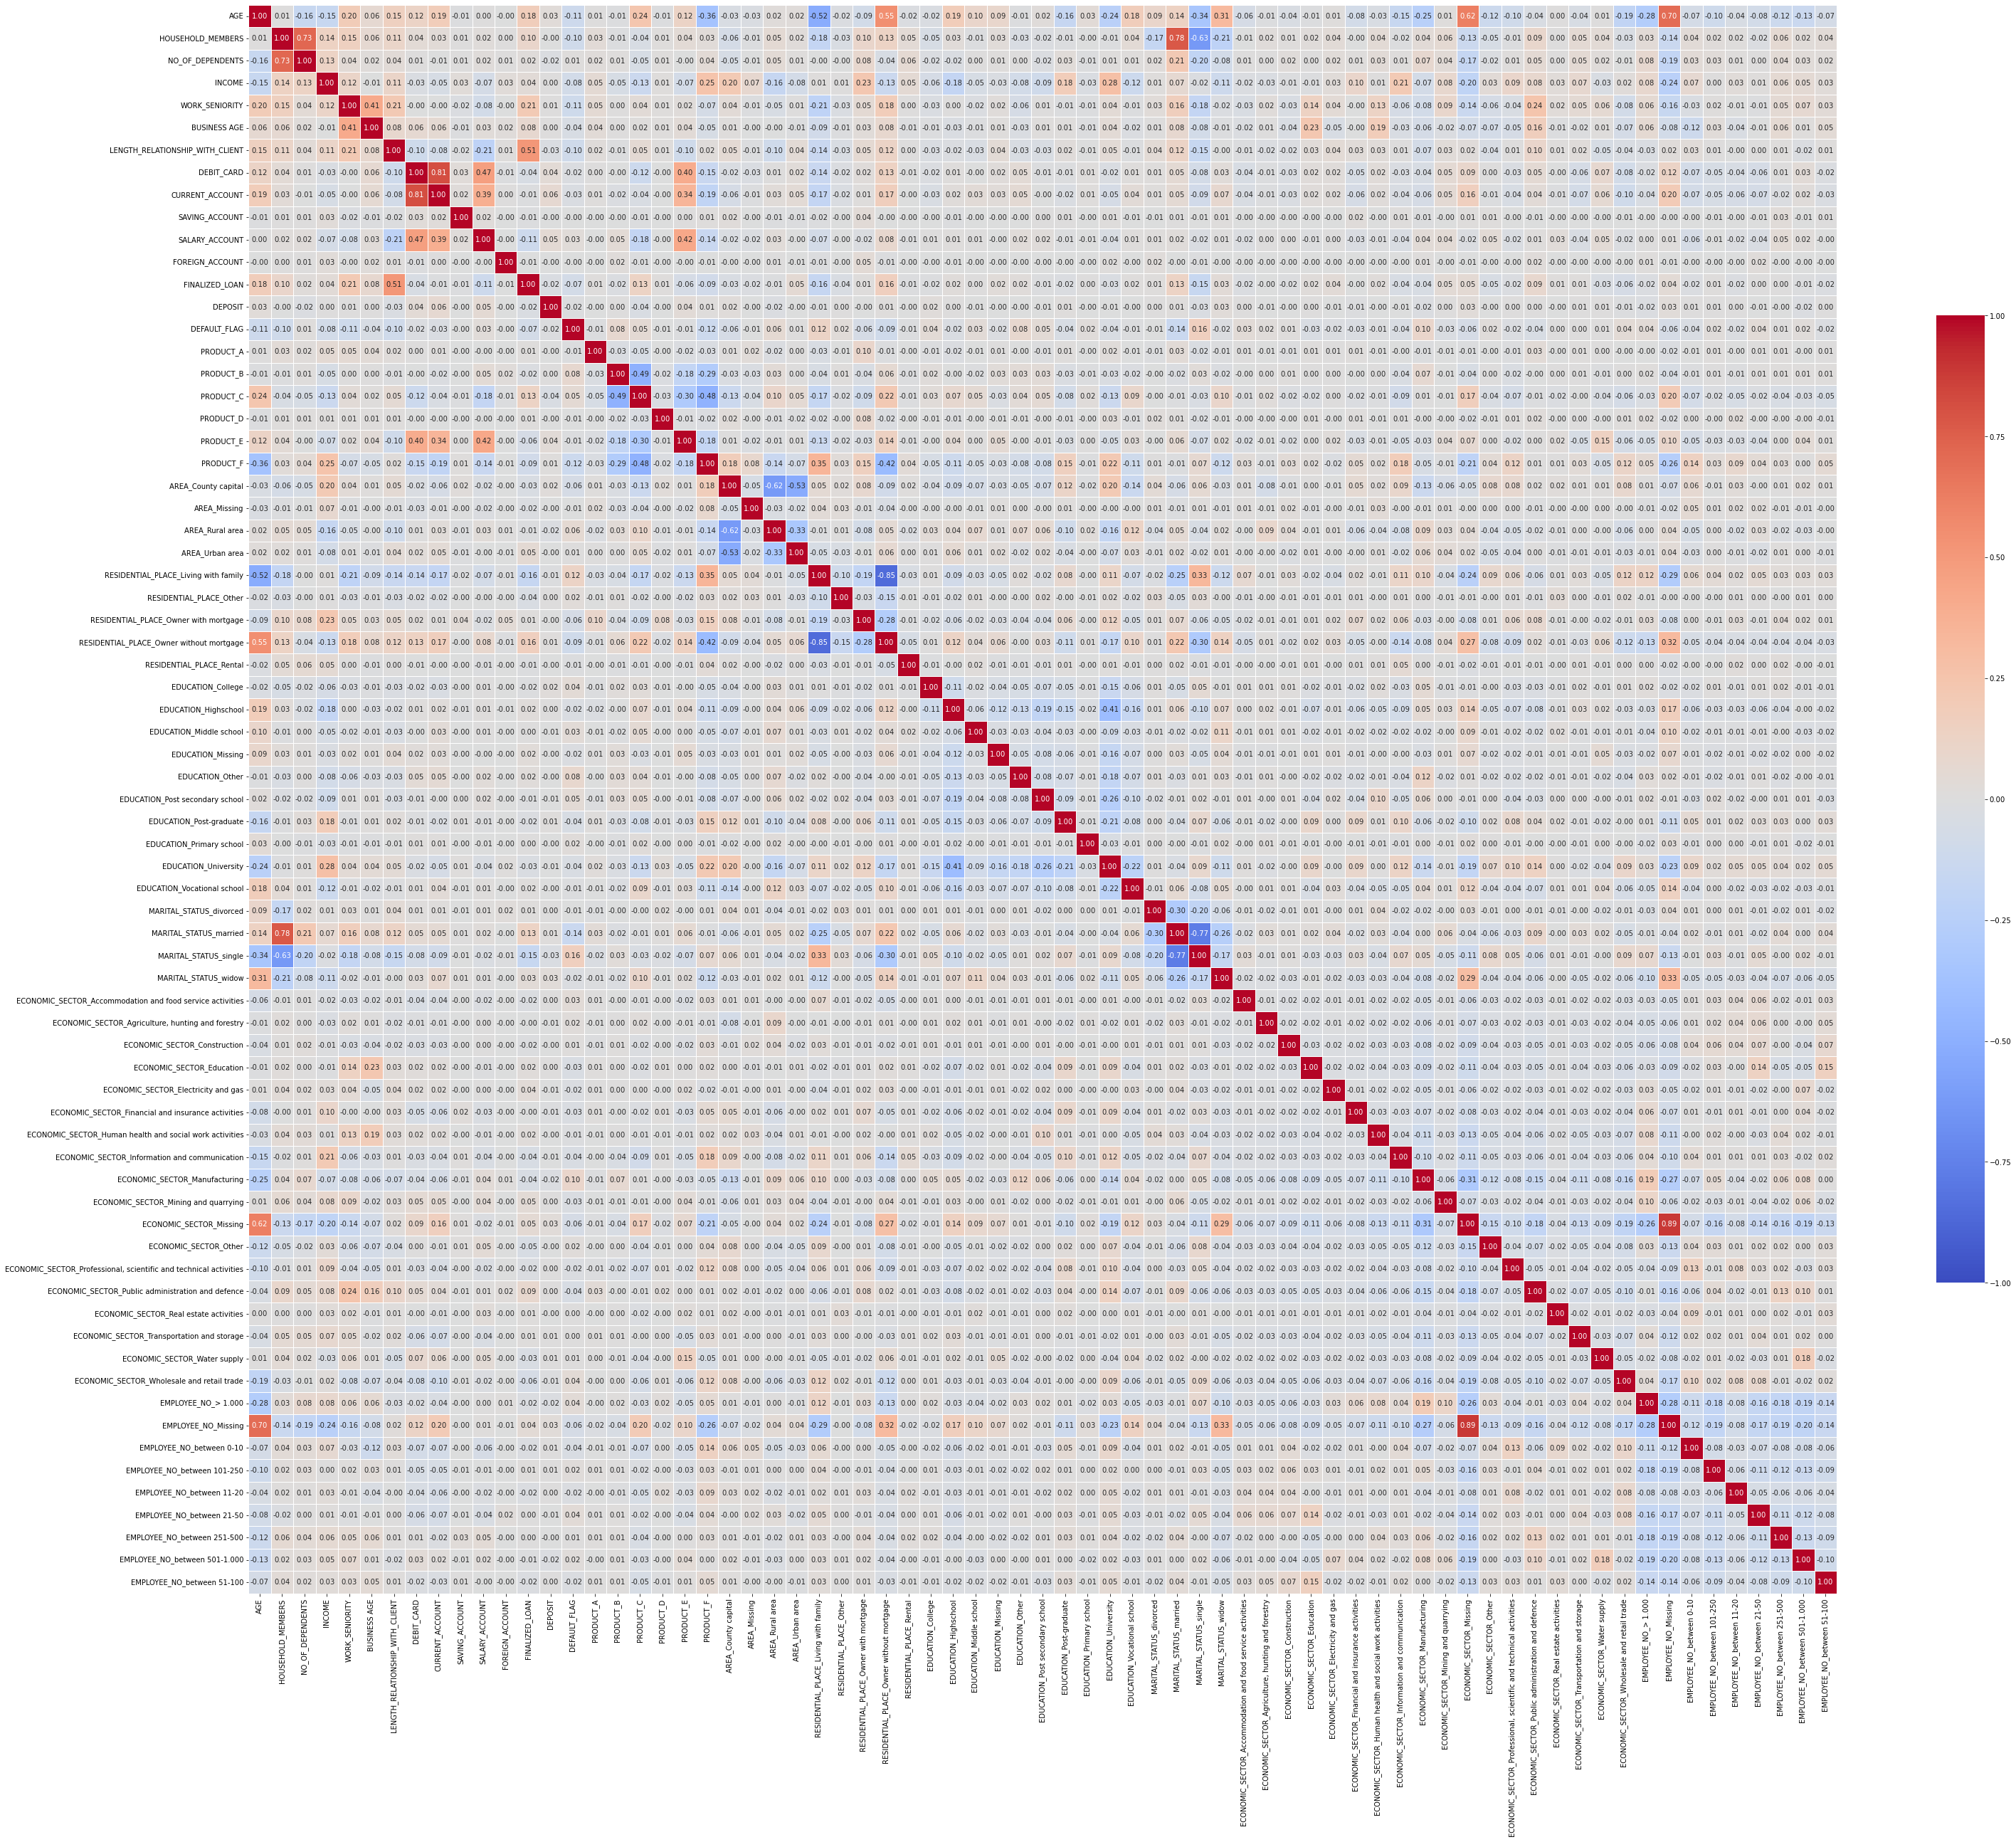

In [231]:
# Badanie korelacji
correlation_matrix = df_train.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.show()

### Zastąpimy teraz Outliery z kolumn 'INCOME', 'WORK_SENIORITY', 'BUSINESS AGE', 'LENGTH_RELATIONSHIP_WITH_CLIENT' 99 percentylem

In [232]:
columns = ['INCOME', 'WORK_SENIORITY', 'BUSINESS AGE', 'LENGTH_RELATIONSHIP_WITH_CLIENT']
percentiles = {col: df_train[col].quantile(0.95) for col in columns}
for col in columns:
    df_train.loc[df_train[col] > percentiles[col], col] = percentiles[col]
for col in columns:
    df_test.loc[df_test[col] > percentiles[col], col] = percentiles[col]

### Znormalizujmy zmienne ciągłe

In [233]:
# from sklearn.preprocessing import MinMaxScaler

# columns_to_scale = ['AGE', 'INCOME', 'WORK_SENIORITY', 'BUSINESS AGE', 'LENGTH_RELATIONSHIP_WITH_CLIENT']


# df_train_scaled = df_train.copy(deep=True)
# df_test_scaled = df_test.copy(deep=True)

# scaler = MinMaxScaler()

# scaler.fit(df_train[columns_to_scale])
# df_train_scaled[columns_to_scale] = scaler.transform(df_train_scaled[columns_to_scale])
# df_test_scaled[columns_to_scale] = scaler.transform(df_test_scaled[columns_to_scale])
# #zachowuje ramki przed skalowaniem, żeby zobaczyć czy modele lepiej poradzą sobie bez niego

## Jak się okazało modele lepiej radzą sobie gdy dane są przeskalowane StandardScalerem dlatego ten wybieramy do dalszej pracy


In [234]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['AGE', 'INCOME', 'WORK_SENIORITY', 'BUSINESS AGE', 'LENGTH_RELATIONSHIP_WITH_CLIENT']

# Tworzenie nowych ram danych dla skalowanych wartości
df_train_scaled = df_train.copy(deep=True)
df_test_scaled = df_test.copy(deep=True)

# Inicjalizacja StandardScaler
scaler = StandardScaler()

# Dopasowanie skalera tylko do danych treningowych
scaler.fit(df_train[columns_to_scale])

# Transformacja danych treningowych i testowych
df_train_scaled[columns_to_scale] = scaler.transform(df_train_scaled[columns_to_scale])
df_test_scaled[columns_to_scale] = scaler.transform(df_test_scaled[columns_to_scale])

# Opcjonalnie, zachowanie ramki danych przed skalowaniem
# Możesz użyć nieprzeskalowanych danych w innym kontekście lub dla porównania wyników


In [235]:
print("Scaled Training Data:")
print(df_train_scaled)
print("\nScaled Test Data:")
print(df_test_scaled)

Scaled Training Data:
            AGE  HOUSEHOLD_MEMBERS  NO_OF_DEPENDENTS    INCOME  \
0      1.590982                  2                 0 -0.507806   
1      1.516691                  2                 0 -0.389653   
2     -1.009215                  2                 0 -0.607580   
3     -0.340593                  1                 0 -0.083331   
4     -0.414884                  1                 0 -0.556818   
...         ...                ...               ...       ...   
15092 -0.934923                  2                 0  0.053201   
15093  0.773778                  1                 0 -1.011049   
15094  0.105155                  1                 0  2.598299   
15095  0.996652                  2                 0  1.670231   
15096 -0.414884                  2                 0 -0.365148   

       WORK_SENIORITY  BUSINESS AGE  LENGTH_RELATIONSHIP_WITH_CLIENT  \
0           -0.290566     -0.117825                        -0.843759   
1           -0.290566     -0.117825      

# tworzenie modeli

In [236]:
X_train = df_train_scaled.drop(columns=["FINALIZED_LOAN"])
y_train = df_train_scaled['FINALIZED_LOAN']

X_test = df_test_scaled.drop(columns=["FINALIZED_LOAN"])
y_test = df_test_scaled['FINALIZED_LOAN']

In [237]:
# X_train_2 = df_train_scaled_2.drop(columns=["FINALIZED_LOAN"])
# y_train_2 = df_train_scaled_2['FINALIZED_LOAN']

# X_test_2 = df_test_scaled_2.drop(columns=["FINALIZED_LOAN"])
# y_test_2 = df_test_scaled_2['FINALIZED_LOAN']

# Modelowanie

In [238]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestClassifier

### Random Forest 

In [239]:
# rf = RandomForestClassifier(n_estimators=150, criterion='gini', min_samples_split=2, min_samples_leaf=1,  bootstrap=True )
# rf.fit(X_train, y_train)
# rfsc = rf.score(X_test, y_test)
# y_pred = rf.predict(X_test)

# print("The rf score is {}".format(rfsc)) 

# acc = accuracy_score(y_test, y_pred) 
# print("The accuracy is {}".format(acc)) 
  
# prec = precision_score(y_test, y_pred) 
# print("The precision is {}".format(prec)) 
  
# rec = recall_score(y_test, y_pred) 
# print("The recall is {}".format(rec)) 
  
# f1 = f1_score(y_test, y_pred) 
# print("The F1-Score is {}".format(f1)) 
  
# MCC = matthews_corrcoef(y_test, y_pred) 
# print("The Matthews correlation coefficient is {}".format(MCC)) 

### Random Forest dla StandardScaler

In [240]:
rf = RandomForestClassifier(n_estimators=150, criterion='gini', min_samples_split=2, min_samples_leaf=1,  bootstrap=True )
rf.fit(X_train, y_train)
rfsc = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)

print("The rf score is {}".format(rfsc)) 

acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 

The rf score is 0.8856613102595797
The accuracy is 0.8856613102595797
The precision is 0.7101063829787234
The recall is 0.5056818181818182
The F1-Score is 0.5907079646017699
The Matthews correlation coefficient is 0.5366849145318979


###  Logistic Regression

In [241]:
# logreg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight='balanced', random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)


  
# acc = accuracy_score(y_test, y_pred) 
# print("The accuracy is {}".format(acc)) 
  
# prec = precision_score(y_test, y_pred) 
# print("The precision is {}".format(prec)) 
  
# rec = recall_score(y_test, y_pred) 
# print("The recall is {}".format(rec)) 
  
# f1 = f1_score(y_test, y_pred) 
# print("The F1-Score is {}".format(f1)) 
  
# MCC = matthews_corrcoef(y_test, y_pred) 
# print("The Matthews correlation coefficient is {}".format(MCC)) 

### Dla standardScaler

In [242]:
logreg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight='balanced', random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


  
acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 

The accuracy is 0.8145859085290482
The precision is 0.4653179190751445
The recall is 0.9147727272727273
The F1-Score is 0.6168582375478928
The Matthews correlation coefficient is 0.5619267546386449


### KNeighborsClassifier

In [243]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_val_score

# knn = KNeighborsClassifier(n_neighbors=13, weights='distance', algorithm='ball_tree', leaf_size=20, p=1, metric='euclidean', metric_params=None, n_jobs=None)

# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)

# print('R^2 score: ', knn.score(X_test, y_test))
# cross_val_scores = []
# neighbors = np.arange(1, 15, 2)

# for i in neighbors:
#     knn = KNeighborsClassifier(n_neighbors=i)
#     scores = cross_val_score(knn, X_train, y_train, cv=10)
#     cross_val_scores.append(np.mean(scores))

# print(f"best cross-validation score: {np.max(cross_val_scores):.3}")
# best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
# print(f"best n_neighbors: {best_n_neighbors}")

# knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
# knn.fit(X_train, y_train)
# print(f"test-set score: {knn.score(X_test, y_test):.3f}")



# acc = accuracy_score(y_test, y_pred) 
# print("The accuracy is {}".format(acc)) 
  
# prec = precision_score(y_test, y_pred) 
# print("The precision is {}".format(prec)) 
  
# rec = recall_score(y_test, y_pred) 
# print("The recall is {}".format(rec)) 
  
# f1 = f1_score(y_test, y_pred) 
# print("The F1-Score is {}".format(f1)) 
  
# MCC = matthews_corrcoef(y_test, y_pred) 
# print("The Matthews correlation coefficient is {}".format(MCC)) 

### Dla standarScaler

In [244]:
knn = KNeighborsClassifier(n_neighbors=13, weights='distance', algorithm='ball_tree', leaf_size=20, p=1, metric='euclidean', metric_params=None, n_jobs=None)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('R^2 score: ', knn.score(X_test, y_test))
cross_val_scores = []
neighbors = np.arange(1, 15, 2)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cross_val_scores.append(np.mean(scores))

print(f"best cross-validation score: {np.max(cross_val_scores):.3}")
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print(f"best n_neighbors: {best_n_neighbors}")

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train_2, y_train_2)
print(f"test-set score: {knn.score(X_test, y_test):.3f}")




acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 

R^2 score:  0.8631025957972805
best cross-validation score: 0.86
best n_neighbors: 11
test-set score: 0.865
The accuracy is 0.8631025957972805
The precision is 0.5986078886310905
The recall is 0.48863636363636365
The F1-Score is 0.5380604796663191
The Matthews correlation coefficient is 0.46192474124703675


### DecisionTree

In [245]:
# from sklearn.tree import DecisionTreeClassifier
# decision_tree = DecisionTreeClassifier(random_state=42)

# decision_tree.fit(X_train, y_train)

# y_pred = decision_tree.predict(X_test)

# acc = accuracy_score(y_test, y_pred) 
# print("The accuracy is {}".format(acc)) 
  
# prec = precision_score(y_test, y_pred) 
# print("The precision is {}".format(prec)) 
  
# rec = recall_score(y_test, y_pred) 
# print("The recall is {}".format(rec)) 
  
# f1 = f1_score(y_test, y_pred) 
# print("The F1-Score is {}".format(f1)) 
  
# MCC = matthews_corrcoef(y_test, y_pred) 
# print("The Matthews correlation coefficient is {}".format(MCC)) 

### Dla standarScaler

In [246]:
decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 

The accuracy is 0.8550679851668727
The precision is 0.5507745266781411
The recall is 0.6060606060606061
The F1-Score is 0.5770964833183048
The Matthews correlation coefficient is 0.49070235184317046


# Wybieramy modele RandomForest, LogisticRegression i DecisionTree do dalszego badania, teraz przeprowanimy tunning hiperparametrów

## tunning hiperparametrów dla RandomForest

In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definicja modelu
rf = RandomForestClassifier()

# Parametry do przetestowania
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Tworzenie GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Najlepsze parametry i wynik
print("Najlepsze parametry:", grid_search_rf.best_params_)
print("Najlepszy wynik:", grid_search_rf.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Najlepsze parametry: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Najlepszy wynik: 0.8802412973902591


### Sprawdźmy wniki dla tych hiperparametrów

In [248]:
rf = RandomForestClassifier(n_estimators=150, min_samples_split=2, min_samples_leaf=1 , max_depth=30)
rf.fit(X_train, y_train)
rfsc = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)

print("The rf score is {}".format(rfsc)) 

acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 

The rf score is 0.8890605686032138
The accuracy is 0.8890605686032138
The precision is 0.7172236503856041
The recall is 0.5284090909090909
The F1-Score is 0.608505997818975
The Matthews correlation coefficient is 0.554248464327023


### Fuature importance

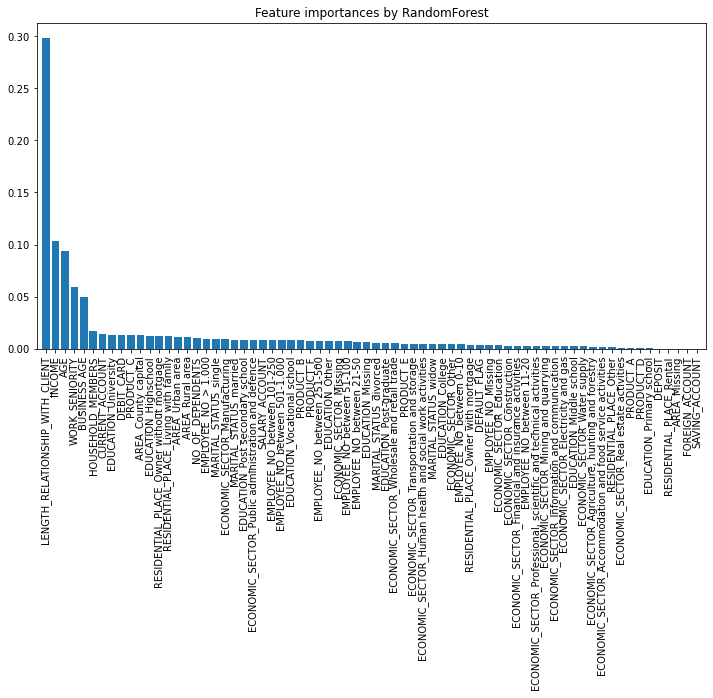

In [249]:
import matplotlib.pyplot as plt

feature_importances_rf = rf.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances_rf)[::-1]

# Wykres
plt.figure(figsize=(12, 6))
plt.title("Feature importances by RandomForest")
plt.bar(range(X_train.shape[1]), feature_importances_rf[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


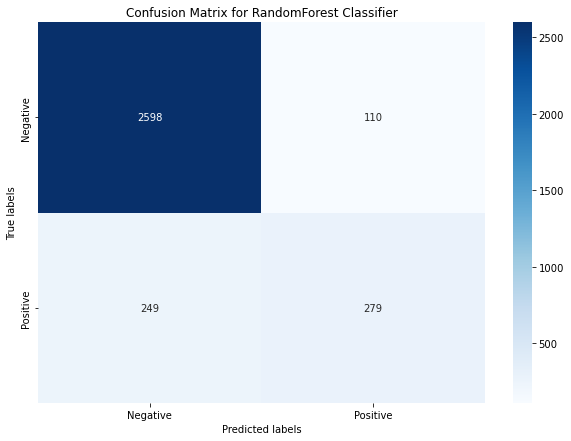

In [250]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for RandomForest Classifier')
plt.show()

## Strojenie hiperparametrów dla LogisticRegression

In [251]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Tworzenie modelu logistycznej regresji z uwzględnieniem niezbalansowanych klas
logreg = LogisticRegression(class_weight='balanced')

# Parametry do przetestowania
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # 'liblinear' i 'saga' wspierają regularyzację L1
}

# Tworzenie GridSearchCV z f1 jako metryką oceny
grid_search_lr = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

# Wyniki
print("Najlepsze parametry:", grid_search_lr.best_params_)
print("Najlepszy wynik f1:", grid_search_lr.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Najlepsze parametry: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Najlepszy wynik f1: 0.6199447633655688


### Sprawdźmy wyniki dla tych hiperparametrów

In [252]:
logreg = LogisticRegression(penalty='l1',  C=1,  solver='liblinear', class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


  
acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 

The accuracy is 0.8136588380716935
The precision is 0.46404602109300097
The recall is 0.9166666666666666
The F1-Score is 0.6161680458306811
The Matthews correlation coefficient is 0.5615464934315406


### Fuature importance

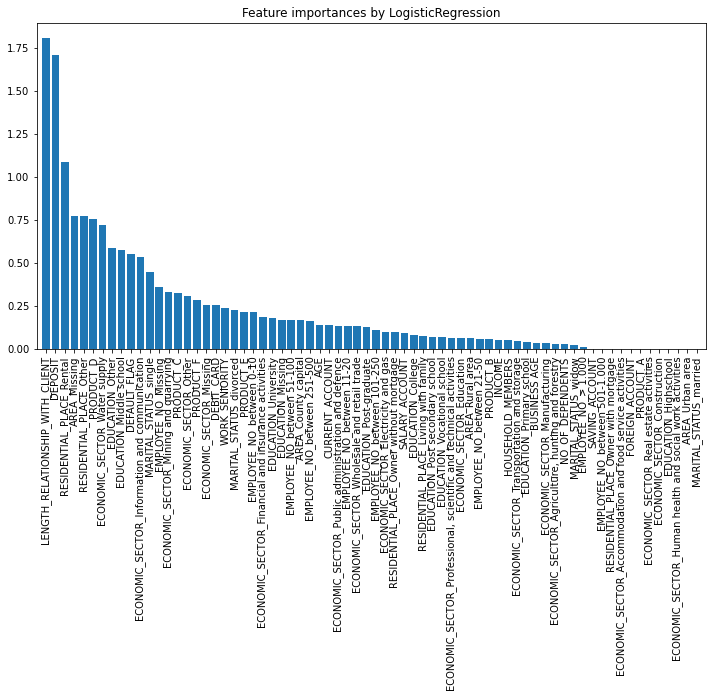

In [253]:
feature_importances_lr = abs(logreg.coef_[0])
indices = np.argsort(feature_importances_lr)[::-1]

# Wykres
plt.figure(figsize=(12, 6))
plt.title("Feature importances by LogisticRegression")
plt.bar(range(X_train.shape[1]), feature_importances_lr[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


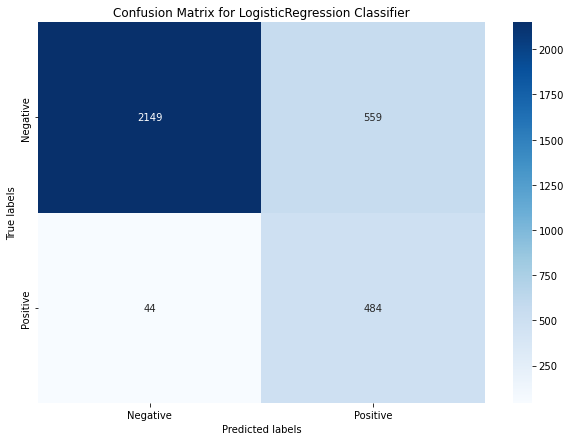

In [254]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for LogisticRegression Classifier')
plt.show()

## Strojenie dla DecisionTree

In [255]:
from sklearn.tree import DecisionTreeClassifier

# Definicja modelu
decision_tree = DecisionTreeClassifier()

# Parametry do przetestowania
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Tworzenie GridSearchCV
grid_search_dt = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)

# Najlepsze parametry i wynik
print("Najlepsze parametry:", grid_search_dt.best_params_)
print("Najlepszy wynik:", grid_search_dt.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Najlepsze parametry: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Najlepszy wynik: 0.8592443662543406


### sprawdźmy wyniki dla tych hiperparametrów

In [256]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf =2, min_samples_split=10)

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 

The accuracy is 0.8593943139678616
The precision is 0.5703275529865125
The recall is 0.5606060606060606
The F1-Score is 0.565425023877746
The Matthews correlation coefficient is 0.48158677225529195


### feature importance

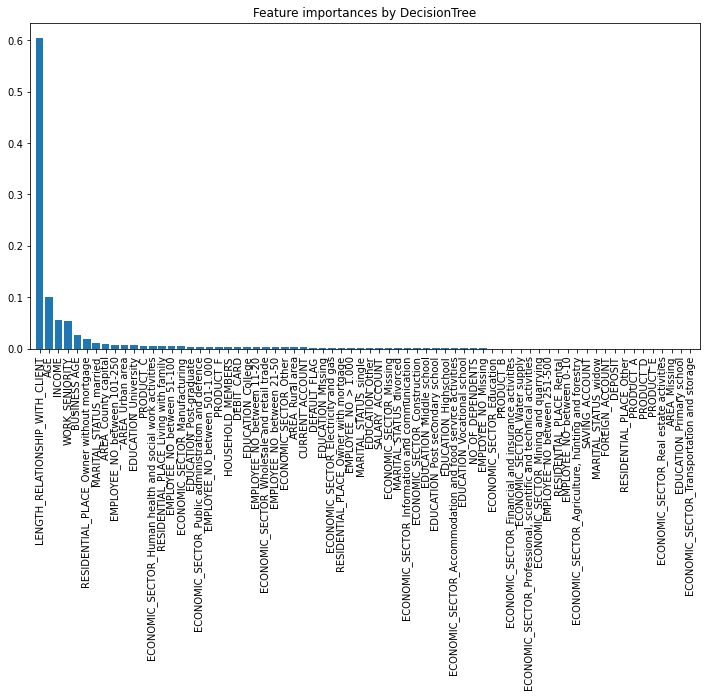

In [257]:
feature_importances_dt = decision_tree.feature_importances_
indices = np.argsort(feature_importances_dt)[::-1]

# Wykres
plt.figure(figsize=(12, 6))
plt.title("Feature importances by DecisionTree")
plt.bar(range(X_train.shape[1]), feature_importances_dt[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


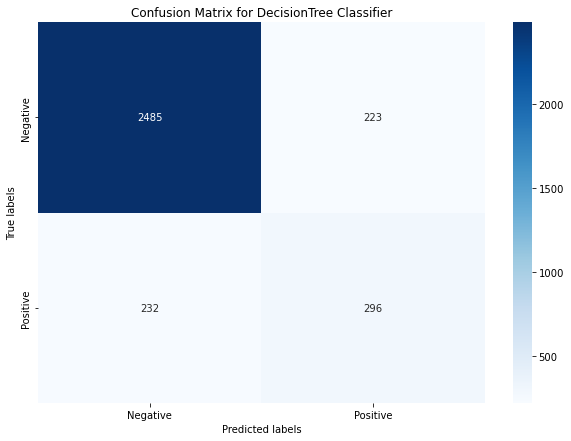

In [258]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for DecisionTree Classifier')
plt.show()

# Badanie zachowania modelu po usunięciu niektórych cech

## RandomForest

In [259]:
feature_importances_rf = rf.feature_importances_
features = X_train.columns
threshold = 0.01
low_importance_features = features[feature_importances_rf < threshold]
print("Cechy do usunięcia:", low_importance_features)


Cechy do usunięcia: Index(['SAVING_ACCOUNT', 'SALARY_ACCOUNT', 'FOREIGN_ACCOUNT', 'DEPOSIT',
       'DEFAULT_FLAG', 'PRODUCT_A', 'PRODUCT_B', 'PRODUCT_D', 'PRODUCT_E',
       'PRODUCT_F', 'AREA_Missing', 'RESIDENTIAL_PLACE_Other',
       'RESIDENTIAL_PLACE_Owner with mortgage', 'RESIDENTIAL_PLACE_Rental',
       'EDUCATION_College', 'EDUCATION_Middle school', 'EDUCATION_Missing',
       'EDUCATION_Other', 'EDUCATION_Post secondary school',
       'EDUCATION_Post-graduate', 'EDUCATION_Primary school',
       'EDUCATION_Vocational school', 'MARITAL_STATUS_divorced',
       'MARITAL_STATUS_married', 'MARITAL_STATUS_single',
       'MARITAL_STATUS_widow',
       'ECONOMIC_SECTOR_Accommodation and food service activities',
       'ECONOMIC_SECTOR_Agriculture, hunting and forestry',
       'ECONOMIC_SECTOR_Construction', 'ECONOMIC_SECTOR_Education',
       'ECONOMIC_SECTOR_Electricity and gas',
       'ECONOMIC_SECTOR_Financial and insurance activities',
       'ECONOMIC_SECTOR_Human health 

In [260]:
X_train_reduced = X_train.drop(low_importance_features, axis=1)
X_test_reduced = X_test.drop(low_importance_features, axis=1)

In [261]:
rf = RandomForestClassifier(n_estimators=150, min_samples_split=2, min_samples_leaf=1 , max_depth=30)
rf.fit(X_train_reduced, y_train)
rfsc = rf.score(X_test_reduced, y_test)
y_pred = rf.predict(X_test_reduced)

print("The rf score is {}".format(rfsc)) 

acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 

The rf score is 0.88442521631644
The accuracy is 0.88442521631644
The precision is 0.6652360515021459
The recall is 0.5871212121212122
The F1-Score is 0.6237424547283702
The Matthews correlation coefficient is 0.5572960893300991


### nieco lepszy recall na rzecz pogorszenia się innych wartości

## LogisticRegression

In [262]:
coefficients = logreg.coef_[0]
# Ustalenie progu, np. współczynniki z wartością bezwzględną poniżej 0.05 mogą być uznane za nisko ważne
threshold = 0.01

# Znalezienie cech o niskich współczynnikach
low_importance_features = [features[i] for i in range(len(coefficients)) if abs(coefficients[i]) < threshold]
print("Cechy do usunięcia:", low_importance_features)


Cechy do usunięcia: ['SAVING_ACCOUNT', 'FOREIGN_ACCOUNT', 'PRODUCT_A', 'AREA_Urban area', 'RESIDENTIAL_PLACE_Owner with mortgage', 'EDUCATION_Highschool', 'MARITAL_STATUS_married', 'ECONOMIC_SECTOR_Accommodation and food service activities', 'ECONOMIC_SECTOR_Construction', 'ECONOMIC_SECTOR_Human health and social work activities', 'ECONOMIC_SECTOR_Real estate activities', 'EMPLOYEE_NO_between 501-1.000']


In [263]:
X_train_reduced = X_train.drop(low_importance_features, axis=1)
X_test_reduced = X_test.drop(low_importance_features, axis=1)


In [264]:
logreg = LogisticRegression(penalty='l1',  C=1,  solver='liblinear', class_weight='balanced')
logreg.fit(X_train_reduced, y_train)
y_pred = logreg.predict(X_test_reduced)


  
acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 

The accuracy is 0.8136588380716935
The precision is 0.46404602109300097
The recall is 0.9166666666666666
The F1-Score is 0.6161680458306811
The Matthews correlation coefficient is 0.5615464934315406


### Gorsze wyniki po usunięciu mało istotnych cech

## DecisionTree

In [265]:
feature_importances_dt = decision_tree.feature_importances_
threshold = 0.01

# Znalezienie cech o niskiej ważności
low_importance_features_dt = [features[i] for i in range(len(feature_importances_dt)) if feature_importances_dt[i] < threshold]
print("Cechy do usunięcia:", low_importance_features_dt)
print(len(low_importance_features_dt))
print(len(X_train.columns))

Cechy do usunięcia: ['HOUSEHOLD_MEMBERS', 'NO_OF_DEPENDENTS', 'DEBIT_CARD', 'CURRENT_ACCOUNT', 'SAVING_ACCOUNT', 'SALARY_ACCOUNT', 'FOREIGN_ACCOUNT', 'DEPOSIT', 'DEFAULT_FLAG', 'PRODUCT_A', 'PRODUCT_B', 'PRODUCT_C', 'PRODUCT_D', 'PRODUCT_E', 'PRODUCT_F', 'AREA_County capital', 'AREA_Missing', 'AREA_Rural area', 'AREA_Urban area', 'RESIDENTIAL_PLACE_Living with family', 'RESIDENTIAL_PLACE_Other', 'RESIDENTIAL_PLACE_Owner with mortgage', 'RESIDENTIAL_PLACE_Rental', 'EDUCATION_College', 'EDUCATION_Highschool', 'EDUCATION_Middle school', 'EDUCATION_Missing', 'EDUCATION_Other', 'EDUCATION_Post secondary school', 'EDUCATION_Post-graduate', 'EDUCATION_Primary school', 'EDUCATION_University', 'EDUCATION_Vocational school', 'MARITAL_STATUS_divorced', 'MARITAL_STATUS_single', 'MARITAL_STATUS_widow', 'ECONOMIC_SECTOR_Accommodation and food service activities', 'ECONOMIC_SECTOR_Agriculture, hunting and forestry', 'ECONOMIC_SECTOR_Construction', 'ECONOMIC_SECTOR_Education', 'ECONOMIC_SECTOR_Electri

In [266]:
X_train_reduced_dt = X_train.drop(low_importance_features_dt, axis=1)
X_test_reduced_dt = X_test.drop(low_importance_features_dt, axis=1)

In [267]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf =2, min_samples_split=10)

decision_tree.fit(X_train_reduced_dt, y_train)

y_pred = decision_tree.predict(X_test_reduced_dt)

acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 

The accuracy is 0.8556860321384425
The precision is 0.5585412667946257
The recall is 0.5511363636363636
The F1-Score is 0.5548141086749286
The Matthews correlation coefficient is 0.46871885196984603


# Crosswalidacja

In [268]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# ponowne importowanie


models = {"Logistic Regression": LogisticRegression(penalty='l1',  C=1,  solver='liblinear', class_weight='balanced'), 
          "Decision Tree Classifier":  DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf =2, min_samples_split=10),
          "Random Forest Classifier": RandomForestClassifier(n_estimators=150, min_samples_split=2, min_samples_leaf=1 , max_depth=30)
         }
results = []

Roc_auc scores for  Logistic Regression :  [0.88991636 0.89090102 0.88693054]
Mean roc_auc_score for  Logistic Regression :  0.889249307279499
Median roc_auc_score for  Logistic Regression :  0.8899163589143898 

Roc_auc scores for  Decision Tree Classifier :  [0.84918968 0.86754057 0.84816026]
Mean roc_auc_score for  Decision Tree Classifier :  0.854963505637377
Median roc_auc_score for  Decision Tree Classifier :  0.849189684404335 

Roc_auc scores for  Random Forest Classifier :  [0.92434907 0.9205307  0.91543205]
Mean roc_auc_score for  Random Forest Classifier :  0.9201039398339662
Median roc_auc_score for  Random Forest Classifier :  0.9205306979042852 



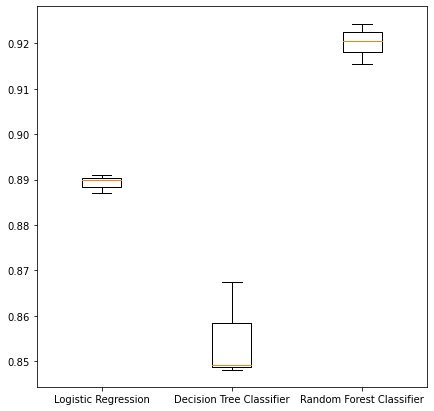

In [269]:
for model in models.values():
    kf = KFold(n_splits = 3, random_state = 420, shuffle = True)
    res_for_model = cross_val_score(model, X_train, y_train, cv = kf, scoring = "roc_auc")
    results.append(res_for_model)

i = 0
for name in models.keys():
    print("Roc_auc scores for ", name, ": ", results[i])
    print("Mean roc_auc_score for ", name, ": ", np.mean(results[i]))
    print("Median roc_auc_score for ", name, ": ", np.median(results[i]), "\n")
    i = i+1

plt.figure(figsize = (7,7))
plt.boxplot(results, labels = models.keys())
plt.show()

Wyniki dla regresji logistycznej są dość wysokie i bardzo zbliżone do siebie, co sugeruje, że model jest stabilny i dobrze radzi sobie z klasyfikacją w różnych podziałach danych. Średnia wartość ROC-AUC bliska 0.89 oznacza, że model ma dobrą zdolność do rozróżniania między klasami.
Wyniki dla drzewa decyzyjnego są niższe niż dla regresji logistycznej i nieco bardziej zmienne, co może wskazywać na to, że model jest mniej stabilny. 
Las losowy osiąga najlepsze wyniki wśród testowanych modeli, z najwyższymi wartościami ROC-AUC, co wskazuje na silną zdolność do klasyfikacji i rozróżniania między klasami. Wyniki są również stabilne między różnymi podziałami danych.

### Odrzucamy na tym etapie model DecisionTree, zoabczymy jeszcze krzywe ROC dla pozostałych dwóch modeli

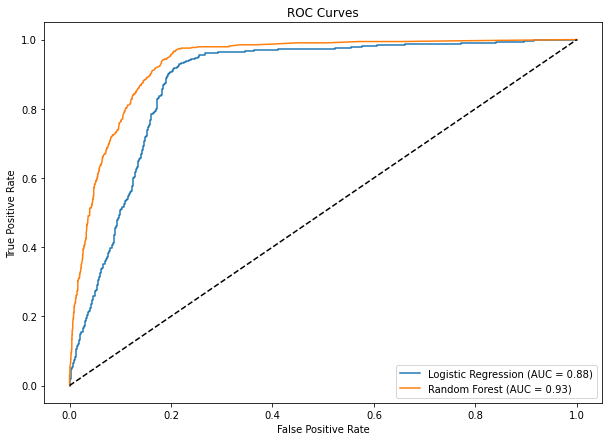

In [273]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Inicjalizacja modeli
log_reg = LogisticRegression(penalty='l1', C=1, solver='liblinear', class_weight='balanced')
random_forest = RandomForestClassifier(n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_depth=30)

# Trenowanie modeli
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Obliczenie prawdopodobieństw dla każdej klasy
probabilities_log_reg = log_reg.predict_proba(X_test)[:, 1]
probabilities_rf = random_forest.predict_proba(X_test)[:, 1]

# Obliczenie wartości dla krzywej ROC
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, probabilities_log_reg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, probabilities_rf)

# Obliczenie obszarów pod krzywymi ROC (AUC)
auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
auc_rf = auc(fpr_rf, tpr_rf)

# Rysowanie krzywych ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Linia dla modelu losowego
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


# Bankowi najbardziej zależałoby na modelu, który ma dużą precyzję, aby nie przynawać kredytów, które nie powinny być przyznane. Najlepszy w tym wypadku okazuję się model RandomForest, z parametrami dobranymi podczas ich strojenia